## Let's compare Gauss-Newton method and Method of Three Squares

In [1]:
import numpy as np
from numpy import linalg as lg

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Solution(object):
    """
    search solution in L2 norm
    """
    def resolveByModifiedNewton(self, x0, F, J, L,  eps = 10e-7, needInf = False, maxIter = 1000):
        """
        Inputs:
        x_0 - start point
        F - function
        J - Jacobian
        L - digit that more o equal to Lipschitz constant 
        Returns :
        if needInf = False :
            x - solution of optimization problem
        else :
            x - solution of optimization problem
            iterCount - count of iterations
        
        """
        iterCount = 1
        x =  x0 - lg.inv(J(x0) + L/2*lg.inv(J(x0).T)).dot(F(x0)) ## поиск argmin(psi)
        while lg.norm(x  - x0) > eps and iterCount < maxIter :
            iterCount += 1
            x0 = x
            x = x0 - lg.inv(J(x0) + L/2*lg.inv(J(x0).T)).dot(F(x0))  ## поиск argmin(psi)
        if needInf:
            return x, iterCount
        return x
    
    def resolveByThreeSquares(self,x_0 , F, J, L, eps = 10e-7, needInf = False, maxIter = 1000):
        """
        Inputs:
        x_0 - start point
        F - function
        J - Jacobian
        L - digit that more o equal to Lipschitz constant 
        Returns :
        if needInf = False :
            x - solution of optimization problem
        else :
            x - solution of optimization problem
            iterCount - count of iterations
        """
        iterCount = 1
        x = x_0 - lg.inv(J(x_0) + L*lg.norm(F(x_0))*lg.inv(J(x_0).T)).dot(F(x_0))  ## поиск argmin(fi)
        while lg.norm(x  - x_0) > eps and iterCount < maxIter : 
            iterCount += 1
            x_0 = x
            x = x_0 - lg.inv(J(x_0) + L*lg.norm(F(x_0))*lg.inv(J(x_0).T)).dot(F(x_0))## поиск argmin(fi)
        if needInf:
            return x, iterCount
        return x
              
        
        def resolveByStochasticSquares(self,x_0 , F, J, L = 1 , eps = 10e-7, needInf = False, maxIter = 1000):
            return 0

## Testing functions

In [3]:
def J1(x):
    J = np.zeros((len(x), len(x)))
    J[0][0] =1
    for i in range(1,len(x)):
        J[i][i] = 1
        J[i][i-1] = 4*x[i-1]
    return J

def F1(x):
    F = np.zeros(len(x))
    F[0] = x[0] - 1
    for i in range(1,len(x)):
        F[i] = x[i] - 2*x[i-1]**2 + 1
    return F
        
        
def J2(x):
    J = np.zeros((len(x), len(x)))
    J[0][0] =1
    for i in range(1,len(x)):
        J[i][i] = 1
        J[i][i-1] = np.pi*2*np.sin(x[i-1])*np.cos(x[i-1])
    return J     


def F2(x):
    F = np.zeros(len(x))
    F[0] = x[0] - 1
    for i in range(1,len(x)):
        F[i] = x[i] - 2*np.sin(np.pi*x[i-1]/2)**2 + 1
    return F

def F3(x):
    return x

def J3(x):
    J = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        J[i][i] = 2* x[i]
    return J

### Function for plot

In [4]:
import matplotlib.pyplot as plt
def printPlot(maxSTEP, iterN, iterT, timeN, timeT):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    
    ax1.plot(range(1,maxSTEP), iterN, 'rx', range(1,maxSTEP), iterT, 'b+', linestyle='solid')
    lgnd = ax1.legend(['Gauss-Newton', 'ThreeSquares'], loc='upper center', shadow=True)
    ax1.set_xlabel('n')
    ax1.set_title('iterations')
    
    ax2 = plt.gca()
    ax2.plot(range(1,maxSTEP), timeN, 'rx', range(1,maxSTEP), timeT, 'b+', linestyle='solid')
    lgnd = ax2.legend(['Gauss-Newton', 'ThreeSquares'], loc='upper center', shadow=True)
    ax2.set_xlabel('n')
    ax2.set_title('time')
    f.set_size_inches(10, 4)
    plt.show()

## Testing function

In [5]:
import time

def Testing(F, J, L = 90, getX = None):
    """
        Inputs:
        F - function
        J - Jacobian
        L - digit that more o equal to Lipschitz constant 
        getX -  the function receives the input number n and returns the starting point
                for the n'th dimension. By default, the point is taken (-1, 1, ...., 1)
        Returns :
        if needInf = False :
            x - solution of optimization problem
        else :
            x - solution of optimization problem
            iterCount - count of iterations
        
    """
    sol = Solution()
    maxSTEP = 11
    AveragetimeN = np.zeros(maxSTEP - 1)
    AveragetimeT = np.zeros(maxSTEP - 1)
    AverageiterT = np.zeros(maxSTEP - 1)
    AverageiterN = np.zeros(maxSTEP - 1)

    #for normalixation
    normalize = 10
    
    for n in range(normalize):
        
        timeN = []
        timeT = []
        iterT = []
        iterN = []
        
        for i in range(1,maxSTEP):
            
            if(getX):
                x_0 = getX(i)
            else:
                x_0 = np.ones(i)
                x_0[0] = -1
            t = time.clock()
            x_n, it = sol.resolveByModifiedNewton(x_0,F, J, L, eps = 10e-3, needInf = True )
            timeN += [time.clock() - t]
            iterN += [it]
            #print("timeN : " + str(timeN[-1]) + "  iterN : " + str(iterN[-1]))
            
            t = time.clock()
            x_t, it = sol.resolveByThreeSquares(x_0,F, J, L, eps = 10e-3, needInf = True)
            timeT += [time.clock() - t]
            iterT += [it]
            #print("timeT : " + str(timeT[-1]) + "  iterT : " + str(iterT[-1]))
        AveragetimeN += np.array(timeN)
        AveragetimeT += np.array(timeT)
        AverageiterT += np.array(iterT)
        AverageiterN += np.array(iterN)
    
    timeN = AveragetimeN/normalize
    timeT = AveragetimeT/normalize
    iterT = AverageiterT/normalize
    iterN = AverageiterN/normalize
    
    printPlot(maxSTEP, iterN, iterT, timeN, timeT) 
    
    



### Testing part

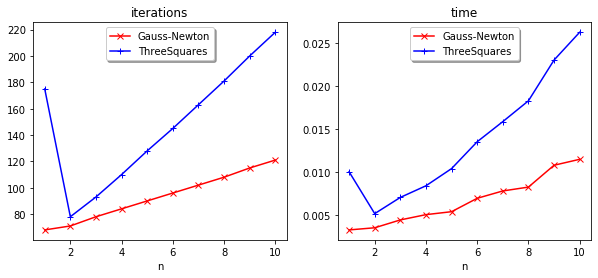

In [6]:
### Testing F1
Testing(F1, J1)

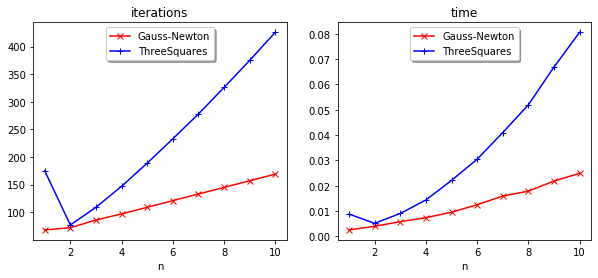

In [7]:
### Testing F2
Testing(F2, J2)

In [8]:
def getX(i):
    x = np.ones(i)
    return x*0.5

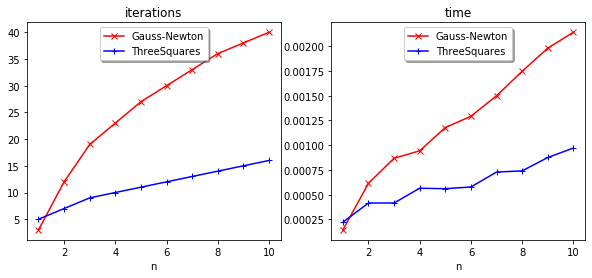

In [9]:
### Test F3
Testing(F3, J3, getX = getX)